In [99]:
b.hogan@snhu.edu, 2021, geocode graphing of  US income


#-----------Exploration School AI Course - Day 5 Geocode Example

print("============================================================================================================")
print("Objective: illustrate use of geocodes to graph income and popluation data by state longitute and latitudes ")

options(warn= (-1) )  #turn off warnings displayed when loading libraries
#install.packages("gdata")
library("gdata")   
df0 <- read.csv("C:/Users/17574/Desktop/_______EXPLO/Exercises/e_day5_am_geocode_graphing_data_income_plus_population.csv")
df1 <-data.frame(df0) 
colnames(df1) <- c("zip","median","pop") #income and population data to merge with latitute and longitute data

#sometimes a zipcode will be missing zeros in front of digits that have to be added back
#Zipcode 201, is actually 00201 and the data needs to be converted to a character type
#convert the zip to char so can merge into a single table
df1[,1] <- sapply(df1[,1], function(x){if(nchar(x)<5){paste0(0,x)}else{x}}) #fill in all zeros for the zipcode values

df2 <- data.frame(read.csv("C:/Users/17574/Desktop/_______EXPLO/Exercises/e_day5_am_geocode_graphing_zipcode_latitute_longitude.csv"))

#example to look at data in Excel
#write.csv(df2, "zipcode.csv", row.names=TRUE) 

df3 <- merge(x=df1, y=df2, by ="zip", all.x=TRUE)  #1.4 Merge by zip code to mean & population df1
colnames(df3) <- c("zip","median","pop","city","state","lat","long")

#Remove Hawaii & Alaska to simplify graphing visual
DC <- which((df3[,5])=="DC")
HI <- which((df3[,5])=="HI")
AK <- which((df3[,5])=="AK")
df3 <- df3[-c(DC,HI,AK),]

str(df3)    #str (structure) shows what data type, integer, real, character, is in the data table      
tail(df3,3)   #32634 ==> rows before state removal

[1] "============================================================================================================"
[1] "Objective: illustrate use of geocodes to graph income and popluation data by state longitute and latitudes "
[1] "a variety of basic techniques for merging and querying data included and common across many applications"
[1] "--------------Obtain, Merge, and Remove some data by state for graphing---------------"
[1] "comments follow hash tags # for more information or other code turned off. Delete hashtag is want to run"
[1] "============================================================================================================"
[1] "IN THIS EXAMPLE, RUN EVERY CODE BLOCK STARTING FROM TOP IF GRAPHS NOT WORKING"
[1] "IN THIS EXAMPLE, RUN EVERY CODE BLOCK STARTING FROM TOP IF GRAPHS NOT WORKING"
[1] "IN THIS EXAMPLE, RUN EVERY CODE BLOCK STARTING FROM TOP IF GRAPHS NOT WORKING"
[1] "====================================================================================

,zip,median,pop,city,state,lat,long
32407,99401,"57,091",273,Anatone,WA,46.08666,-117.2491
32408,99402,"57,091","1,875",Asotin,WA,46.23051,-117.1292
32409,99403,"42,707","19,475",Clarkston,WA,46.40037,-117.0831


In [ ]:
suppressWarnings(require("ggplot2"))  #library("ggplot2")
suppressWarnings(require("ggmap")) #library("ggmap")
us <-map_data("state") #from ggmap giving us map
suppressWarnings(require("sqldf")) #library("sqldf")
suppressWarnings(require("mapproj"))   #library("mapproj")  #-basic US map
suppressWarnings(require("maps"))
print("============================================================================================================")

In [101]:
print("============================================================================================================")
print("------Scrub data by lowering names so income and population data is merged with latitute and longitude data")
print("============================================================================================================")

df3$city <- tolower(df3$city)
df3$state.abb <- tolower(df3$state)
tail(df3,2)

df.state <- data.frame(state.abb,state.name, stringsAsFactors = FALSE) #need full name
df.state$state.abb <- tolower(df.state$state.abb)
df.state$state.name <- tolower(df.state$state.name)  #make lower case so can merge

#Merge data now that values are all the same in lower case
dfstep2 <- data.frame(merge(x=df3, y=df.state, by ="state.abb", all.x=TRUE)) #dfstep5 <-dfstep2 #
head(dfstep2,2)

dfstep2 <- dfstep2[,c(-2,-5,-6)] #remove columns not needed by its index value
colnames(dfstep2) <- c("abb","median","pop","lat","long","state") 

print("============================================================================================================")
print("final table used for the graphing")
print("============================================================================================================")
head(dfstep2,1)

[1] "============================================================================================================"
[1] "------Scrub data by lowering names so income and population data is merged with latitute and longitude data"
[1] "============================================================================================================"


,zip,median,pop,city,state,lat,long,state.abb
32408,99402,"57,091","1,875",asotin,WA,46.23051,-117.1292,wa
32409,99403,"42,707","19,475",clarkston,WA,46.40037,-117.0831,wa


state.abb,zip,median,pop,city,state,lat,long,state.name
al,35766,"39,356",150,princeton,AL,34.84294,-86.23149,alabama
al,35640,"49,509","24,267",hartselle,AL,34.44218,-86.94027,alabama


[1] "============================================================================================================"
[1] "final table used for the graphing"
[1] "============================================================================================================"


abb,median,pop,lat,long,state
al,"39,356",150,34.84294,-86.23149,alabama


[1] "============================================================================================================"
[1] "SQL (structured query language) is often used for making a summary data table for graphing and analysis"
[1] "============================================================================================================"


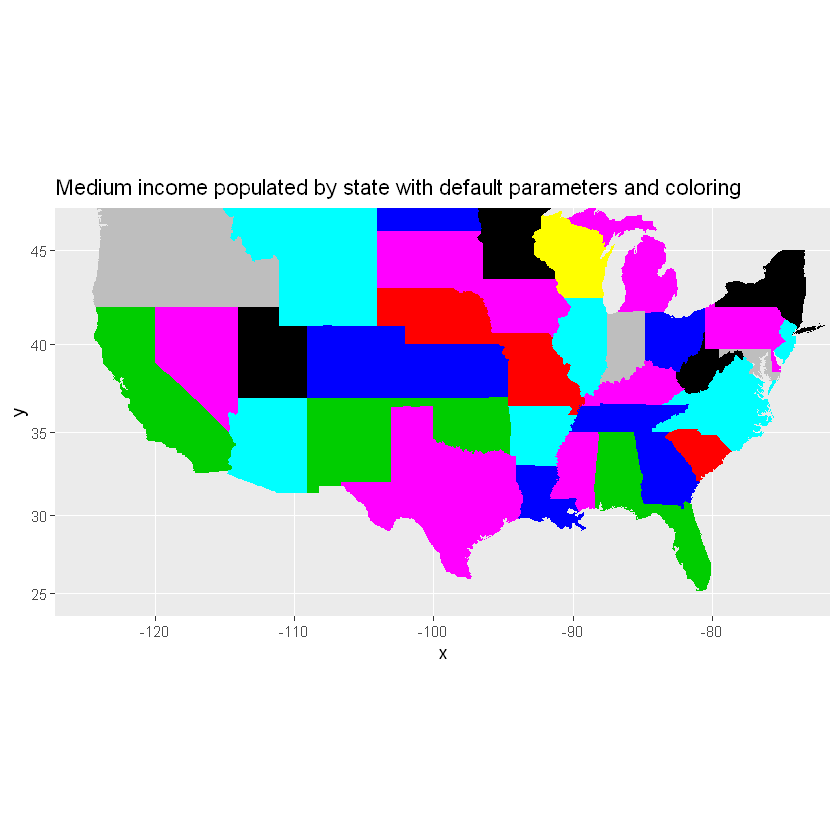

In [103]:
print("============================================================================================================")
print("SQL (structured query language) is often used for making a summary data table for graphing and analysis")
print("============================================================================================================")

dfstep2$pop <- as.numeric(dfstep2$pop)  #ensure data is numeric if not certain
dfstep2$median <- as.numeric(dfstep2$median)
#query data with SQL for graphing

df2_3_4 <- sqldf('  select state, 
                    round(AVG(median),0) as median, 
                    MIN(lat) as lat, 
                    MIN(long) as long 
                    from dfstep2 group by state')

#build graph in ggplot
ggplot(df2_3_4, aes(map_id=state))+ expand_limits(x=df2_3_4$long, y=df2_3_4$lat) +
  geom_map(map = us, fill=df2_3_4$median)+ coord_map() +
  ggtitle("Medium income populated by state with default parameters and coloring")

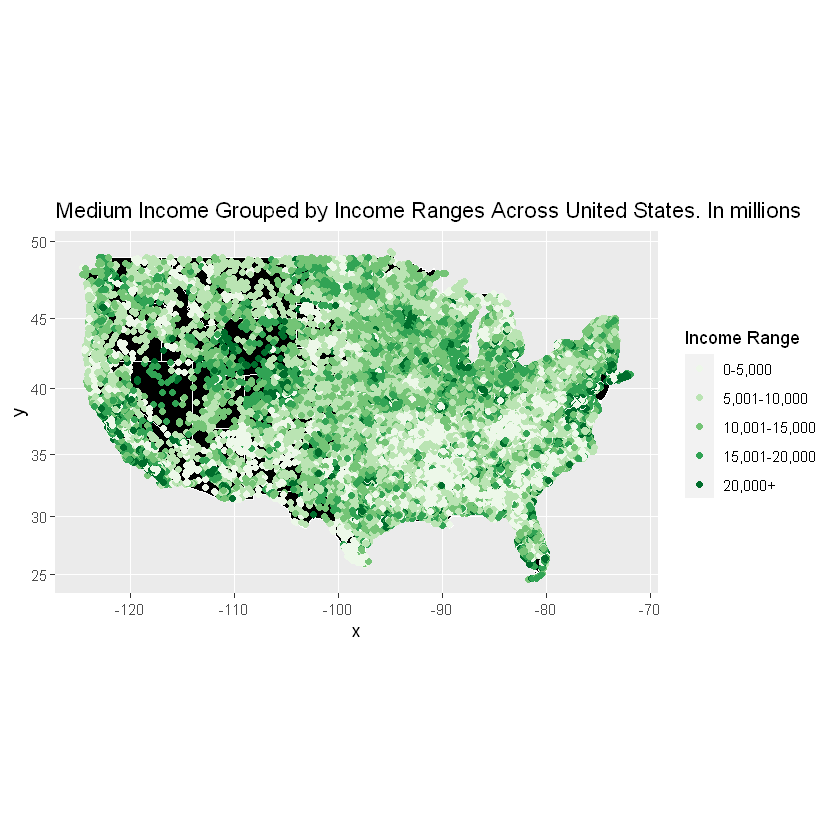

In [74]:
suppressWarnings(require("RColorBrewer")) #install.packages("RColorBrewer")
grpsize <- c(1:nrow(dfstep2))  #fill in blanks to add a group size variable
df4 <-cbind(dfstep2,grpsize)   #Gadd state full name back for mapping please
df4$median <- as.numeric(df4$median )
df4$grpsize <- as.character(df4$grpsize)


df4$grpsize <- cut(df4$median,           #make buckets for mapping
    breaks = c(-Inf, 5000, 10000, 15000, 20000, Inf), 
    labels = c("0-5,000","5,001-10,000","10,001-15,000","15,001-20,000","20,000+"), 
                       right = FALSE)

mycolors <- brewer.pal(5, "Greens") 
names(mycolors) <-levels(df4$grpsize)  #getting the color names

ggplot(df4, aes(map_id=state)) + expand_limits(x=df4$long, y=df4$lat) +
  geom_map(map = us, fill="black", color="white") + coord_map() +
  geom_point(aes(x=df4$long,y=df4$lat, color=df4$grpsize )) +
  scale_colour_manual(name="Income Range", values=mycolors) +
  ggtitle("Medium Income Grouped by Income Ranges Across United States Zipcodes. In millions") 

[1] "============================================================================================="
[1] "============================================================================================="


state.abb,zip,median,pop,city,state,lat,long,state.name
al,35766,"39,356",150,princeton,AL,34.84294,-86.23149,alabama


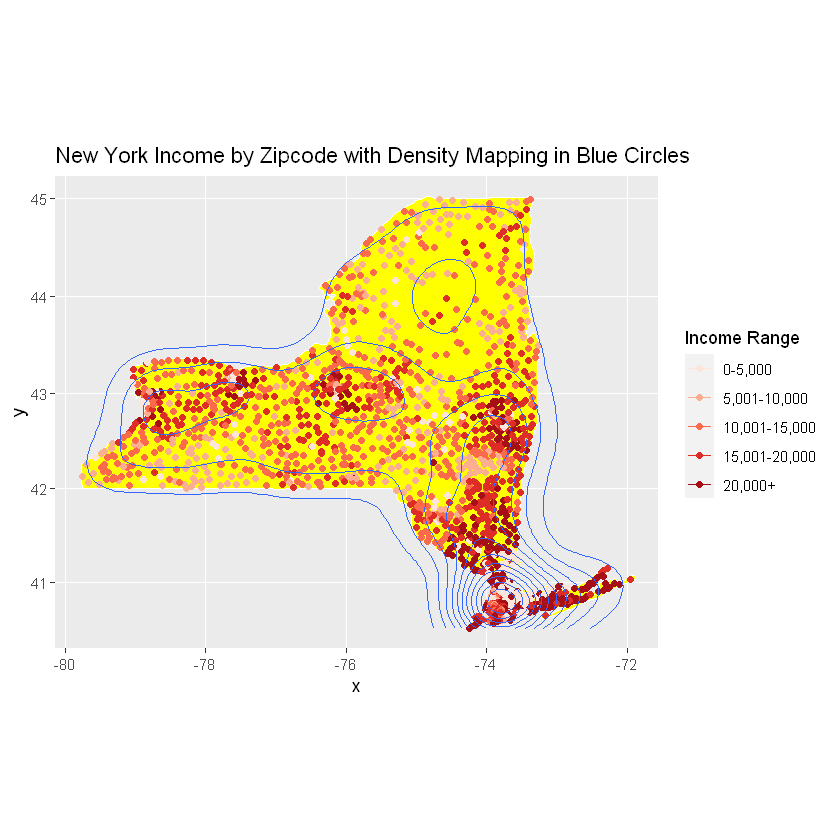

In [104]:
dfstep5 <- data.frame(merge(x=df3, y=df.state, by ="state.abb", all.x=TRUE))
head(dfstep5,1)  #  state.abb   zip median      city      lat      long   state.name

dfstep5 <- dfstep5[,c(-4,-5)]  #Remove mean and pop
colnames(dfstep5) <- c("abb","zip","median","city","lat","long","state") 
dfstep5$median <- as.numeric(dfstep5$median)   #32291 obs. of  7 variables:

df5ny <-data.frame (sqldf('select   zip, 
                                    median, 
                                    long, lat, city, state  
                                    from dfstep5 where state="new york"  '))  #query NY

incomebucket <- c(1:nrow(df5ny))  #biuld a variable
df5ny <-cbind(df5ny,incomebucket) 
df5ny$incomebucket <- as.character(df5ny$incomebucket)

#==========Build Buckets for 
df5ny$incomebucket <- cut(df5ny$median,           #make buckets for mapping
                   breaks = c(-Inf, 5000, 10000, 15000, 20000, Inf), 
                   labels = c("0-5,000","5,001-10,000","10,001-15,000","15,001-20,000","20,000+"), 
                              right = FALSE)
#=GRAPH IT======================================

mycolors <- brewer.pal(5, "Reds")   #head(df4,1)
names(mycolors) <- levels(df5ny$incomebucket)  #getting the color names

ggplot(df5ny, aes(map_id=state)) + expand_limits(x=df5ny$long, y=df5ny$lat) +
  geom_map(map = us, fill="yellow", color="white") + coord_map() +
  geom_point(aes(x=df5ny$long,y=df5ny$lat, color=df5ny$incomebucket )) +
  stat_density2d(data=df5ny,aes(x=df5ny$long,y=df5ny$lat), geom = "density_2d")+   #density circles
  scale_colour_manual(name="Income Range", values=mycolors) +
  ggtitle("New York Income by Zipcode with Density Mapping in Blue Circles")